In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('../../../Binance_Merge_OI_Taker.csv')

df = pd.read_csv('../../../Binance_Merge_AGGdepth_OI_Taker.csv')
#df = pd.read_csv('../../../CG_BTC_H_All_openInterest.csv')
df

,Unnamed: 0,datetime,Volume,Close,taker_buy_vol,taker_sell_vol,taker_sel_buy_ratio,start_time_x,end_time_x,open_interest,low,open,high,askssUsd,asksAmount,start_time_y,bidsAmount,end_time_y,bidsUsd
0,0,2024-09-05 08:00:00,3.611413e+08,56984.0,1.766561e+08,1.844853e+08,0.957562,1725523200000,1725526799000,2.929767e+10,2.910845e+10,2.918629e+10,2.930658e+10,6.566767e+07,1146.556,1725523200,788.261,1729122200,4.498289e+07
1,1,2024-09-05 09:00:00,6.178824e+08,56768.0,2.984248e+08,3.194576e+08,0.934161,1725526800000,1725530399000,2.931916e+10,2.918817e+10,2.929767e+10,2.940060e+10,4.506482e+07,788.355,1725526800,946.816,1729125800,5.389654e+07
2,2,2024-09-05 10:00:00,3.703885e+08,56745.9,1.911700e+08,1.792185e+08,1.066687,1725530400000,1725533999000,2.938246e+10,2.927436e+10,2.931916e+10,2.941219e+10,4.688842e+07,823.430,1725530400,937.037,1729129400,5.312167e+07
3,3,2024-09-05 11:00:00,2.897858e+08,56666.1,1.602766e+08,1.295093e+08,1.237569,1725534000000,1725537599000,2.939166e+10,2.931884e+10,2.938246e+10,2.942752e+10,4.814538e+07,845.818,1725534000,1064.353,1729133000,6.031025e+07
4,4,2024-09-05 12:00:00,1.158487e+09,56639.0,5.641575e+08,5.943294e+08,0.949234,1725537600000,1725541199000,2.935708e+10,2.917309e+10,2.939166e+10,2.945955e+10,4.638605e+07,815.952,1725537600,1171.485,1729136600,6.630448e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2555,2024-12-20 19:00:00,8.785741e+08,97079.6,4.460199e+08,4.325542e+08,1.031131,1734721200000,1734724799000,6.221086e+10,6.220178e+10,6.227676e+10,6.260141e+10,7.923182e+07,814.488,1734721200,947.385,1738320200,9.165848e+07
2556,2556,2024-12-20 20:00:00,8.188863e+08,96426.6,3.916679e+08,4.272184e+08,0.916786,1734724800000,1734728399000,6.181387e+10,6.181387e+10,6.221086e+10,6.226064e+10,8.106530e+07,832.552,1734724800,937.477,1738323800,9.082709e+07
2557,2557,2024-12-20 21:00:00,1.244285e+09,96602.6,6.086979e+08,6.355871e+08,0.957694,1734728400000,1734731999000,6.151873e+10,6.091726e+10,6.181387e+10,6.182199e+10,7.739124e+07,799.730,1734728400,1180.368,1738327400,1.136056e+08
2558,2558,2024-12-20 22:00:00,5.015017e+08,97419.9,2.673029e+08,2.341988e+08,1.141350,1734732000000,1734735599000,6.208223e+10,6.147905e+10,6.151873e+10,6.209337e+10,7.821752e+07,807.480,1734732000,861.923,1738331000,8.307724e+07


In [18]:
#process

df['ask-bid-usd'] = df['bidsUsd'] -df['askssUsd']

df['mean']          = df['ask-bid-usd'].mean()
df['std']    = df['ask-bid-usd'].std()
df['z']      = ( df['ask-bid-usd'] - df['mean'])/df['std']
#df = df.head(200)

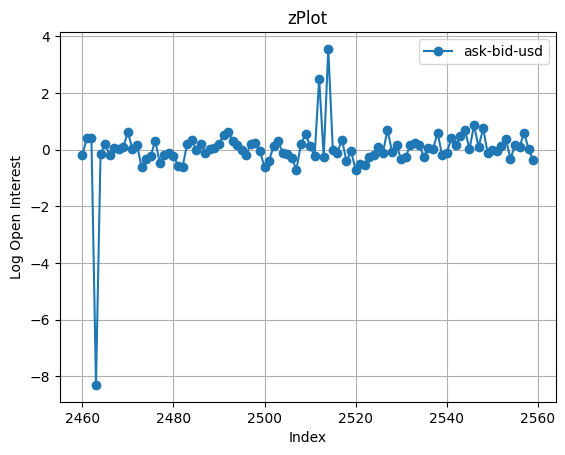

In [19]:
#plot 資料
plt.figure("z")
plt.plot(df.index, df['z'], marker='o', label='ask-bid-usd')  # 使用折線圖
plt.xlabel("Index")  # X 軸標籤
plt.ylabel("Log Open Interest")  # Y 軸標籤
plt.title("zPlot")  # 圖形標題
plt.legend()  # 顯示圖例
plt.grid(True)  # 添加網格
plt.show()

In [23]:
import plotly.graph_objects as go

# Create a scatter plot using Scattergl
fig = go.Figure(
    data=go.Scattergl(
       x=df.index,y= df['z'], 
        mode="markers", 
        marker=dict(opacity=0.5, color="blue")
    )
)

fig.update_layout(title="Scatter Plot with 10,000 Points", xaxis_title="X", yaxis_title="Y")
fig.show()

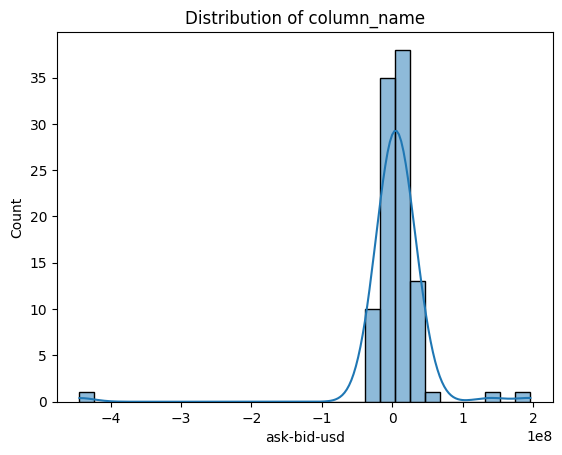

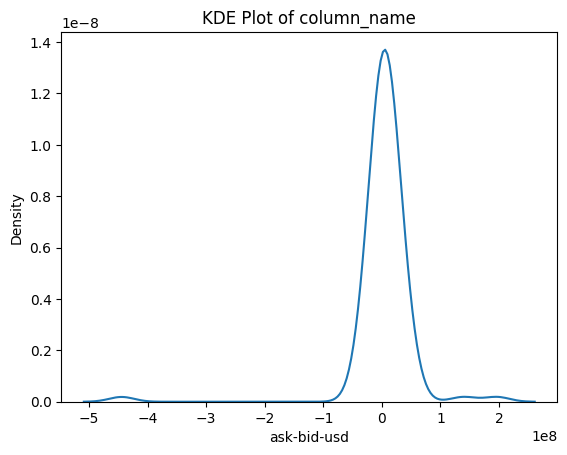

In [13]:
import seaborn as sns

# 使用直方圖

sns.histplot(df['ask-bid-usd'], kde=True, bins=30)
plt.title('Distribution of column_name')
plt.show()

# 或者使用核密度估計 (KDE) 單獨顯示
sns.kdeplot(df['ask-bid-usd'])
plt.title('KDE Plot of column_name')
plt.show()

In [8]:
stats = df['open_interest'].describe()
print(stats)


count    1.726400e+04
mean     2.358697e+10
std      1.346415e+10
min      8.577667e+09
25%      1.182327e+10
50%      1.821514e+10
75%      3.320415e+10
max      7.017943e+10
Name: open_interest, dtype: float64
